# Bulldozer dataset-Kaggle Challenge

# 1) Importing key modules

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from pandas_summary import DataFrameSummary
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
from fastai.imports import *
from fastai.tabular import *

# 2) Loading data

In [7]:
df_raw = pd.read_csv('Train_bulldozer2.csv', low_memory=False, parse_dates=["saledate"])

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


**SalePrice is our dependent variable. Lets see states**

# 3) Knowing dataset

In [10]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

**We can see couple of missing value indication.**

In [12]:
df_raw.shape

(401125, 53)

**As we are interested with sales price and also we are interested with ratios not differences, hence we'll use log**

In [13]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [14]:
?df_raw.drop # checking what drop function does. Double question mark will show source code

In [15]:
df_raw.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

## a) Time series data issues
**We need to deal with time series. There are weeks, days, hours, end of month, end of year and many more exceptional cases where sales price may be varied and effected by date-time**

In [16]:
add_datepart

<function fastai.tabular.transform.add_datepart(df:pandas.core.frame.DataFrame, field_name:str, prefix:str=None, drop:bool=True, time:bool=False)>

In [17]:
?add_datepart

In [18]:
""""
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

This is only given to show that there will be an error.
"""

'"\nm = RandomForestRegressor(n_jobs=-1)\n# The following code is supposed to fail due to string values in the input data\nm.fit(df_raw.drop(\'SalePrice\', axis=1), df_raw.SalePrice)\n\nThis is only given to show that there will be an error.\n'

**We tried to fit model. But there are some contineous variables like saleprice and some are categorical variables. These categorical variables are to be shown in numerical data as we are working with a dependent variable which is numeric i.e contineous and hence , we will deal with regression problem **

In [19]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [20]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


**add_datepart has fixed our problem. Now we have all date-time entities with an efficient code.** 

**The categorical variables are all currently strings, which is not very efficient. The following function converts them to pandas categories.**

## b) Dealing with categorical features

In [21]:
def convert_cats(df):
    for i, j in df.items():
        if pd.api.types.is_string_dtype(j):
            df[i] = j.astype('category').cat.as_ordered()

In [22]:
convert_cats(df_raw)

**We can specify the order to use for categorical variables if we wish:**

In [23]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

**There is mis-match. As we categorize usually with Low, medium and high.**

In [24]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [25]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

**Categorization order problem has been fixed now**

In [26]:
# Making codes of all these categories i.e value of 1,2 ,3 etc
df_raw.UsageBand = df_raw.UsageBand.cat.codes

### saving this work

In [27]:
import os
os.makedirs('ml_fastai', exist_ok=True)
df_raw.to_feather('ml_fastai/bulldozers-raw')

In [32]:
#Loading again to reduce load on PC
import feather
df_raw = feather.read_dataframe('ml_fastai/bulldozers-raw')

## c) Checking missing values

### Lets fix missing value problem now

In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   401125 non-null int8
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGroup

In [34]:
import missingno as msno

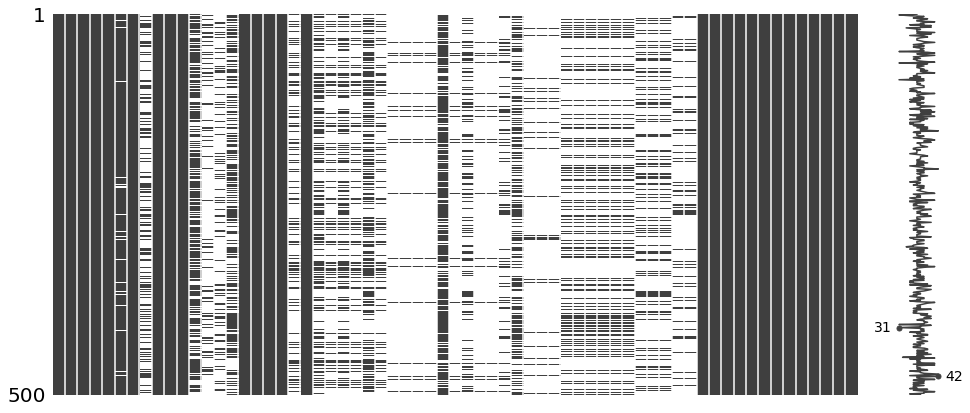

In [35]:
msno.matrix(df_raw.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

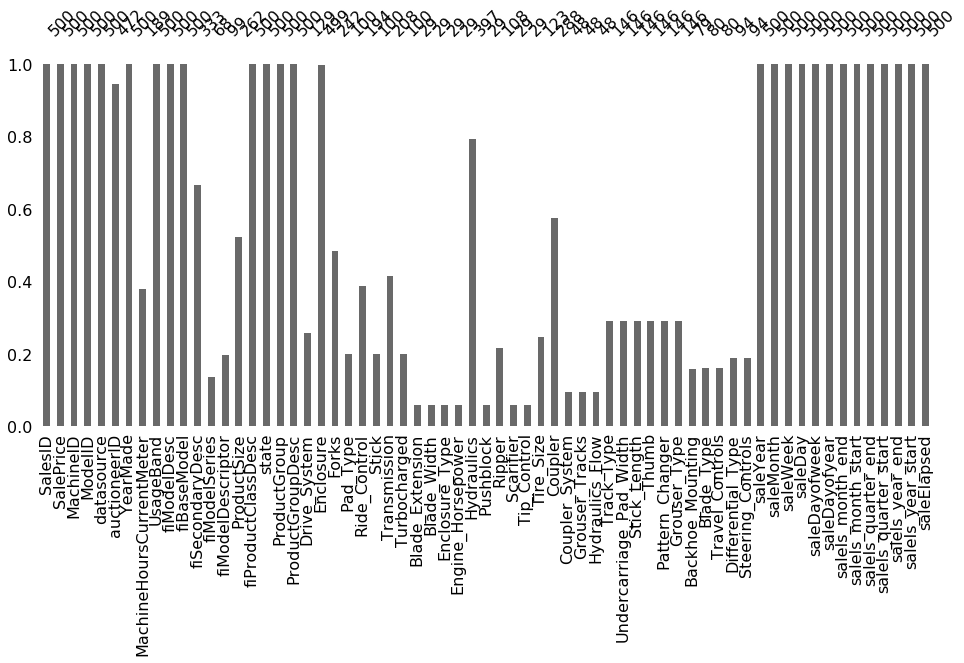

In [36]:
msno.bar(df_raw.sample(500),
            figsize=(16, 7),)

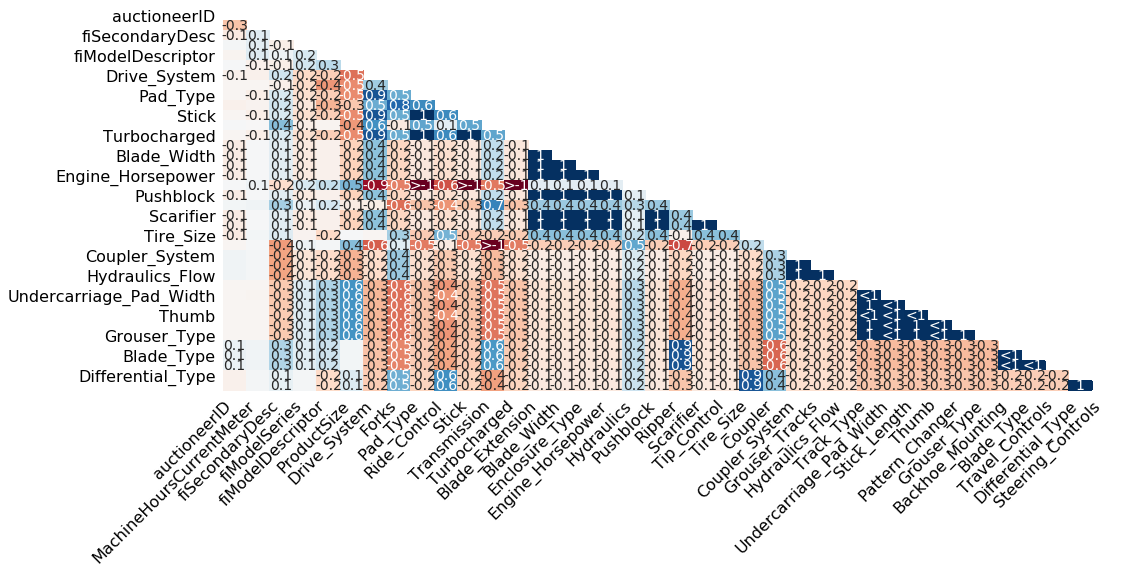

In [37]:
msno.heatmap(df_raw.sample(500),
            figsize=(16, 7),)

In [38]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col) # sets boolean to na's in col and adds to df
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [39]:
# Convert strings into numbers
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat == None or col.nunique() > max_n_cat):
        df[name] = col.cat.codes + 1

In [40]:
# Permutation is done by get_sample
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [41]:
# fast ai's proc_df function to split off response variable and change df to entirely numeric
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: 
        ignore_flds=[]
    if not skip_flds: 
        skip_flds=[]
    if subset: 
        df = get_sample(df,subset)
    else: 
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: 
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: 
        na_dict = {}
    else: 
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): 
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: 
        mapper = scale_vars(df, mapper)
    for n,c in df.items(): 
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: 
        res = res + [mapper]
    return res

In [42]:
# Problem fixing function of proc_df as by fastai
df, y, nas = proc_df(df_raw, 'SalePrice')

## d) Know rigte datatype before modeling

In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
type(y)

numpy.ndarray

In [45]:
type(nas)

dict

# 4) Model

In [46]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(df, y)
model.score(df,y)

0.9831221930365485

** This is our R-squared value. R-squared is a statistical measure of how close the data are to the fitted regression line. ... 0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean**

## a) split into training and validation sets

** our data can lead to overfitting. A validation set helps diagnose this problem. **

In [47]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [48]:
X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## b) Making rmse function

In [49]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [50]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## c) Fitting model again

In [51]:
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 18 s
[0.09031740142935187, 0.25027509821234734, 0.9829518328955119, 0.8881378261280106]


** RMSE Train= 0.090, RMSE valid= 0.25, R2 Train=0.98, R2 valid=0.89 **

**An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation R2 is only 0.88 whereas train R2 is 0.98. It means that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.**

## d) Single tree

In [52]:
model = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[0.5371269683343529, 0.5674541015387145, 0.3970396664995464, 0.42494490873722085]


Very low values for R2 from single tree

In [53]:
#a bigger tree wuth depth greater than 3 i.e uptill end leaf node point.
model = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

[8.58675118495947e-07, 0.3526330295247014, 0.999999999998459, 0.7779279250350611]


**The training set result looks great! But the validation set is worse than our original model. It was 0.88 and now it is 0.78. It is suggested to use bagging in random forests.**

# e) Bagging

In [54]:
# Using original model
model = RandomForestRegressor(n_jobs=-1) # by default n_estimator is 10
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 18.2 s
[0.09024685382712373, 0.25112604592165966, 0.9829784553972825, 0.8873758591188069]


In [55]:
preds = np.stack([t.predict(X_valid) for t in model.estimators_])

In [56]:
preds.shape

(10, 12000)

In [57]:
# Showing 1st col. of 10 predictions from each tree
preds[:,0]

array([9.21034 , 9.10498 , 8.961879, 9.024011, 9.10498 , 9.10498 , 9.10498 , 9.047821, 9.305651, 8.987197])

In [58]:
# mean of all values 
np.mean(preds[:,0])

9.095681841863287

In [59]:
y_valid[0]

9.104979856318357

** Note how good mean value is and how bad is individual estimators are**

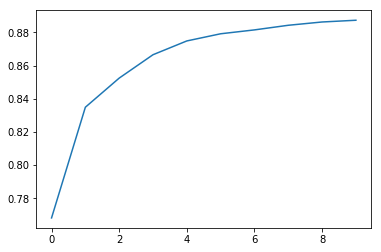

In [60]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check that with random changing values of hyper parameter. 

### Randomly changing hyper-parameters

In [61]:
model = RandomForestRegressor(n_estimators=10 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 17.6 s
[0.09027936925896686, 0.24692253723036806, 0.9829661876548695, 0.8911146539417512]


**Exact same result as we expected. Both commands are same**

In [62]:
model = RandomForestRegressor(n_estimators=20 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 32.2 s
[0.08242722100622145, 0.24149334006714326, 0.98580039896519, 0.895850235939459]


**Not much improvement though. Let's increase value of hyper-parametre**

In [63]:
model = RandomForestRegressor(n_estimators=40 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 1min 10s
[0.07831106474705107, 0.240352429187564, 0.9871831564300207, 0.8968320013920598]


In [64]:
model = RandomForestRegressor(n_estimators=80 ,n_jobs=-1)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 2min 16s
[0.07615028617154675, 0.23416194593864723, 0.9878806896891136, 0.9020779242555627]


## f) Out of bag score

In [65]:
model = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time model.fit(X_train, y_train)
print_score(model)

Wall time: 1min 12s
[0.07844638272927039, 0.2377602754472021, 0.9871388243077432, 0.899045294919831, 0.908416505979251]


**our validation set time difference is making an impact**

## g) Using SUBSAMPLING technique
To speed up and reduce overfitting, we use this approach

In [66]:
# Speed up: We have been using whole dataset. This takes more processing time and competing power. We can reduce this Wall time.
def set_rf_samples(n):
    """Changes scikit learn's random forests giving each tree a random sample of n random rows
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
                                      forest.check_random_state(rs).randint(0, n_samples, n))
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
                                    forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [67]:
set_rf_samples=20_000

In [68]:
model=RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

Wall time: 1min 14s
[0.07849045803028476, 0.23764124200881412, 0.9871243680787564, 0.8991463545062065, 0.9084645995723407]


In [69]:
model=RandomForestRegressor(n_estimators=40,max_features=0.5,min_samples_leaf=3,n_jobs=-1,oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

Wall time: 35.9 s
[0.11909520423406685, 0.22908583488102693, 0.9703569167889408, 0.9062773744678856, 0.9117537901714313]


**Result:<br> So the final validation score of 0.2322 was very good when compared to the leaderboard results on kaggle for the same competition.**

# Confidence based on tree variance

In [70]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [71]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [72]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [73]:
set_rf_samples=50000

In [74]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11925355115194844, 0.22970557699781216, 0.9702780385276183, 0.9057695960186561, 0.9114141447438239]


In [75]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 1.96 s


(9.176935236737952, 0.14550594628406627)

In [76]:
# define function "parallel trees"
def parallel_trees(m, fn, n_jobs=8):
        return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))
    
# get preds
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

Exception in thread Thread-601:
Traceback (most recent call last):
  File "C:\Users\Hassan\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Hassan\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Hassan\Anaconda3\lib\concurrent\futures\process.py", line 295, in _queue_management_worker
    shutdown_worker()
  File "C:\Users\Hassan\Anaconda3\lib\concurrent\futures\process.py", line 253, in shutdown_worker
    call_queue.put_nowait(None)
  File "C:\Users\Hassan\Anaconda3\lib\multiprocessing\queues.py", line 129, in put_nowait
    return self.put(obj, False)
  File "C:\Users\Hassan\Anaconda3\lib\multiprocessing\queues.py", line 83, in put
    raise Full
queue.Full



BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

(9.176935236737952, 0.14550594628406627)

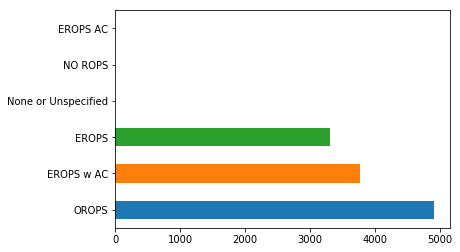

In [77]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [78]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837160,0.247968
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.591989,0.228743
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.679668,0.203080


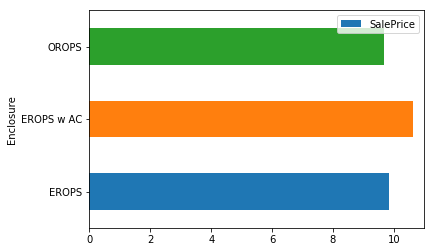

In [79]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

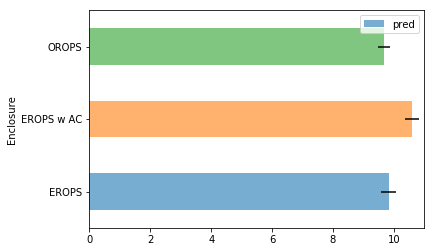

In [80]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

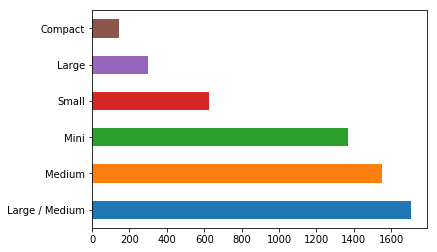

In [81]:
raw_valid.ProductSize.value_counts().plot.barh();

In [82]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.811493,0.287511
Large,10.470589,10.419474,0.331746
Large / Medium,10.691871,10.661605,0.262144
Medium,10.681511,10.624353,0.242566
Mini,9.535147,9.554102,0.221651
Small,10.324448,10.336391,0.269013


In [83]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.031839
Compact           0.029304
Small             0.026026
Large / Medium    0.024588
Mini              0.023200
Medium            0.022831
dtype: float64

# 6) Feature importance
It's not normally enough to just to know that a model can make accurate predictions - we also want to know how it's making predictions. The most important way to see this is with feature importance.

In [84]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [85]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.170063
37,Coupler_System,0.095757
13,ProductSize,0.090495
14,fiProductClassDesc,0.079952
2,ModelID,0.061756
39,Hydraulics_Flow,0.059323
63,saleElapsed,0.052559
10,fiSecondaryDesc,0.043982
19,Enclosure,0.043396
38,Grouser_Tracks,0.041008


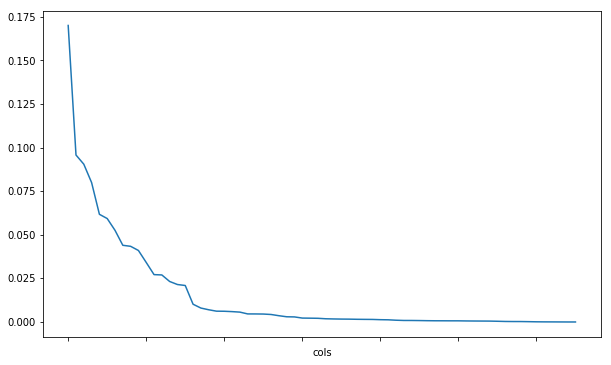

In [86]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [87]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

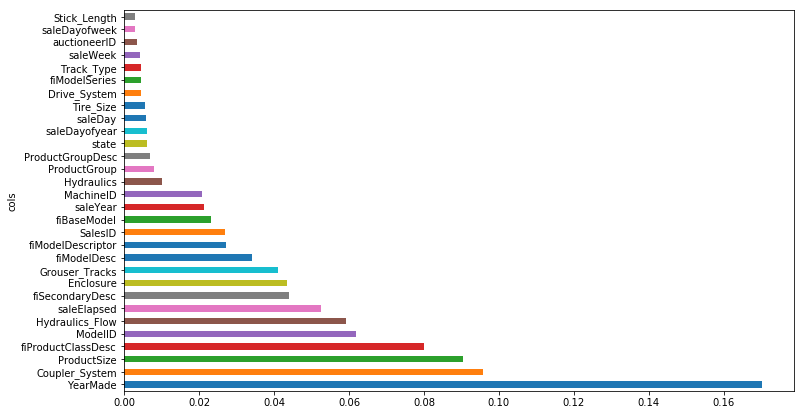

In [88]:
plot_fi(fi[:30]);

In [89]:
# Keeping cut-off 0.5
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

23

In [90]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [91]:
# model again with important features
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12525594897454834, 0.2250828028570799, 0.9672107449889106, 0.9095241643168327, 0.9094148041478881]


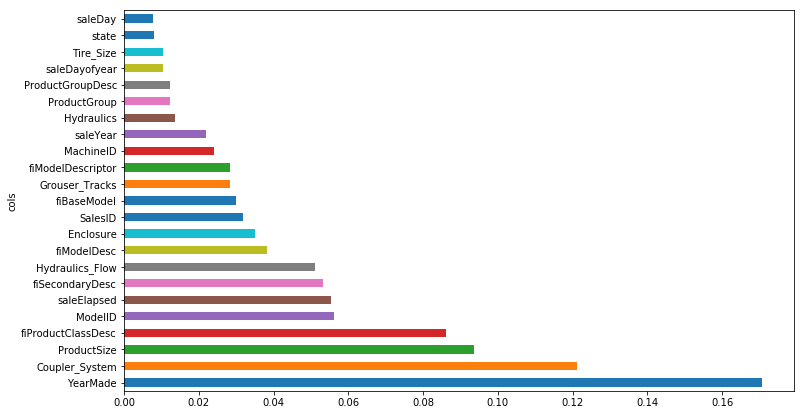

In [92]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

# 7 ) One-hot encoding

In [93]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11801150218172218, 0.23428851166576312, 0.9708939344390324, 0.9019720408844292, 0.910318344153398]


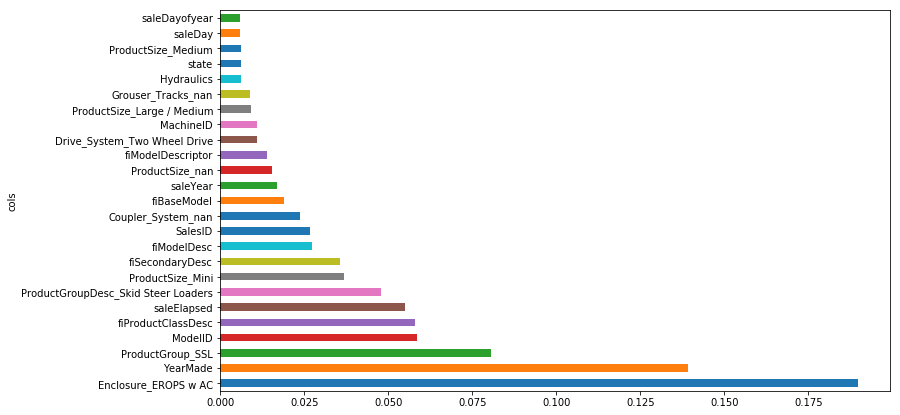

In [94]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

# 8) Removing redundant features

In [95]:
from scipy.cluster import hierarchy as hc

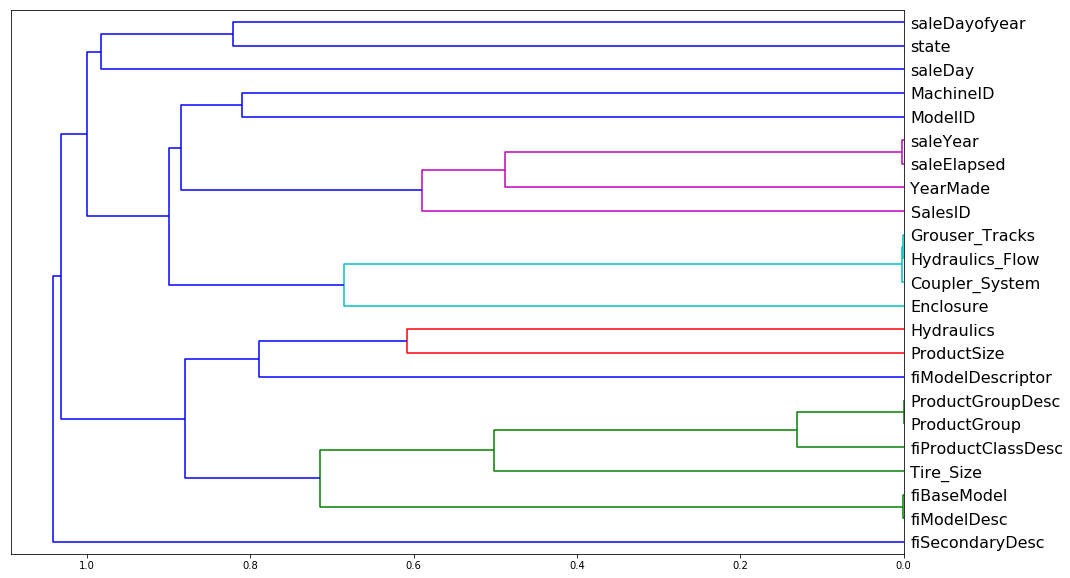

In [96]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [97]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [98]:
get_oob(df_keep)

0.9056252583714107

Now we try removing each variable one at a time.

In [99]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.9055077296380487
saleElapsed 0.9038746379064178
fiModelDesc 0.9052344547689956


C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


fiBaseModel 0.9046641528092438


C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Grouser_Tracks 0.9045333153231441
Coupler_System 0.9061233812638985


In [100]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']

In [101]:
get_oob(df_keep.drop(to_drop, axis=1))

0.9051580478655571

Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

In [102]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [103]:
np.save('ml_fastai/keep_cols.npy', np.array(df_keep.columns))

In [104]:
keep_cols = np.load('ml_fastai/keep_cols.npy')
df_keep = df_trn[keep_cols]

### And let's see how this model looks on the full dataset.

In [105]:
reset_rf_samples()

In [106]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12586977653443937, 0.22729016945334768, 0.9668885843972446, 0.9077408861615401, 0.9075117749469811]


# 9) Partial dependence

In [112]:
from pdpbox import pdp
from plotnine import *

In [114]:
set_rf_samples=50000

In [115]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

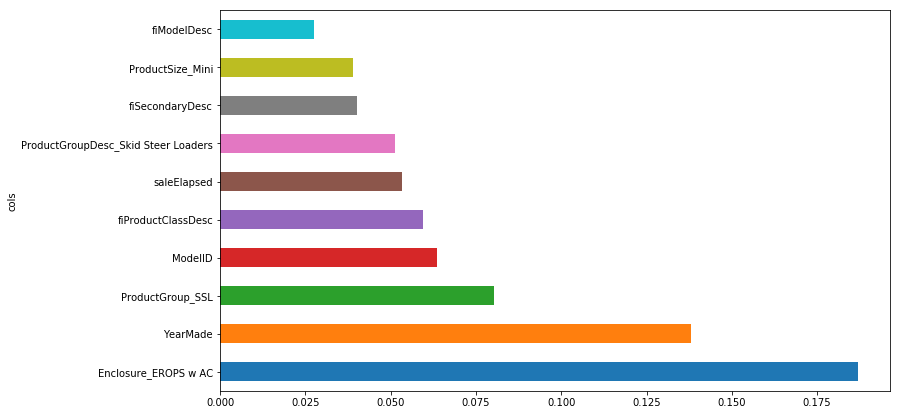

In [116]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

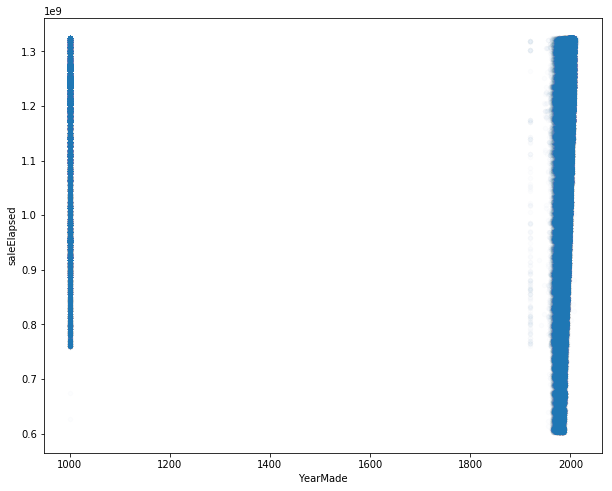

In [117]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [118]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

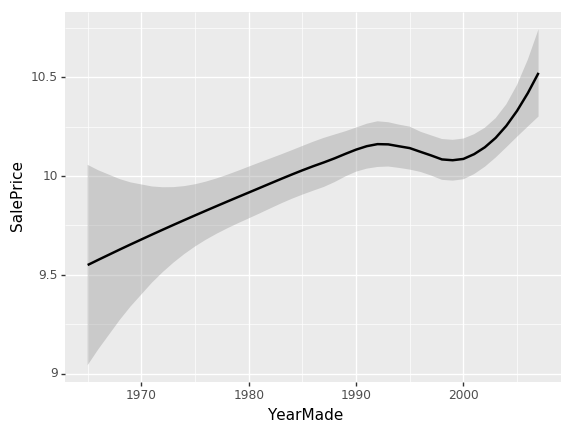

<ggplot: (-9223371848409314609)>

In [121]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [122]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [125]:
def plot_pdp(feat_name, clusters=None):
#feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feature=feat_name, model_features=x.columns)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                   cluster=clusters is not None, n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be01d41f60>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be01ed8b70>})

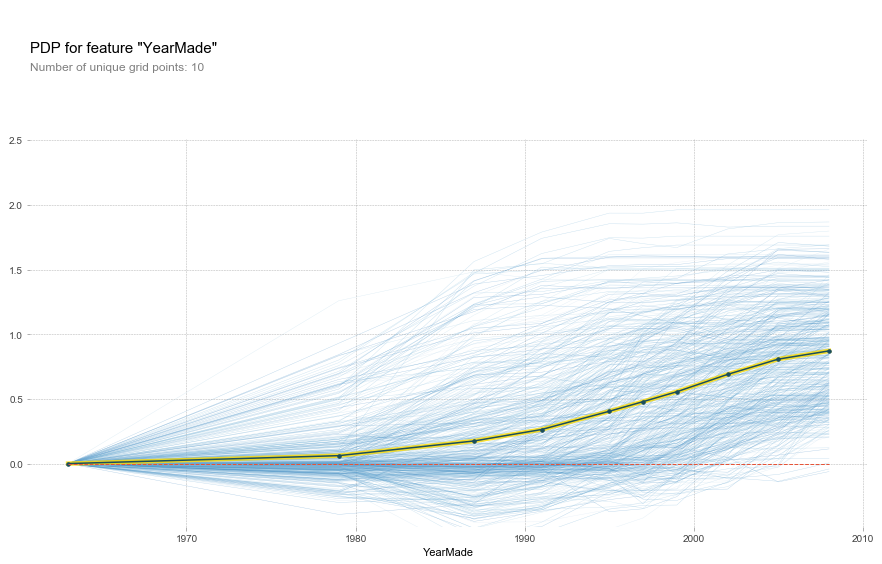

In [126]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be03f69c50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be03f74400>})

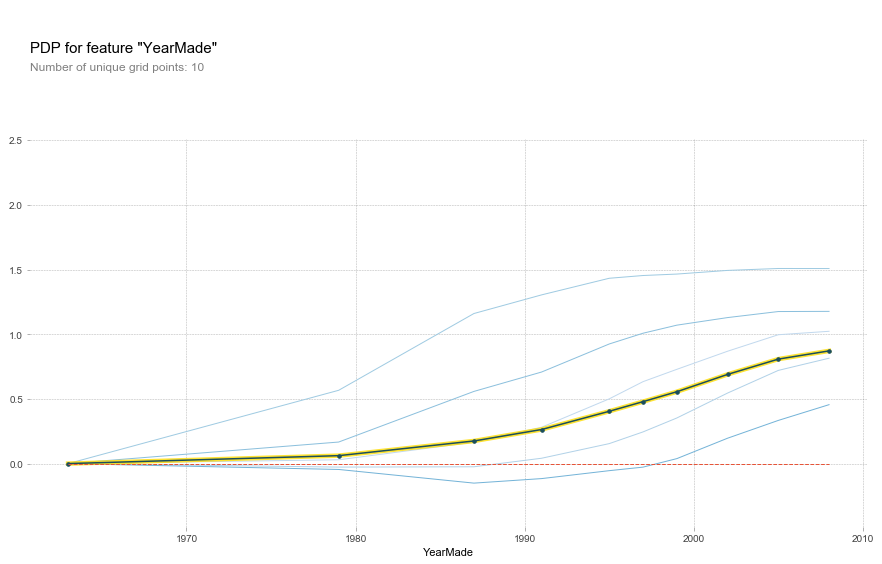

In [127]:
plot_pdp('YearMade', clusters=5)

In [132]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

TypeError: pdp_interact() missing 1 required positional argument: 'features'

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be03faab38>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2be04e5b3c8>})

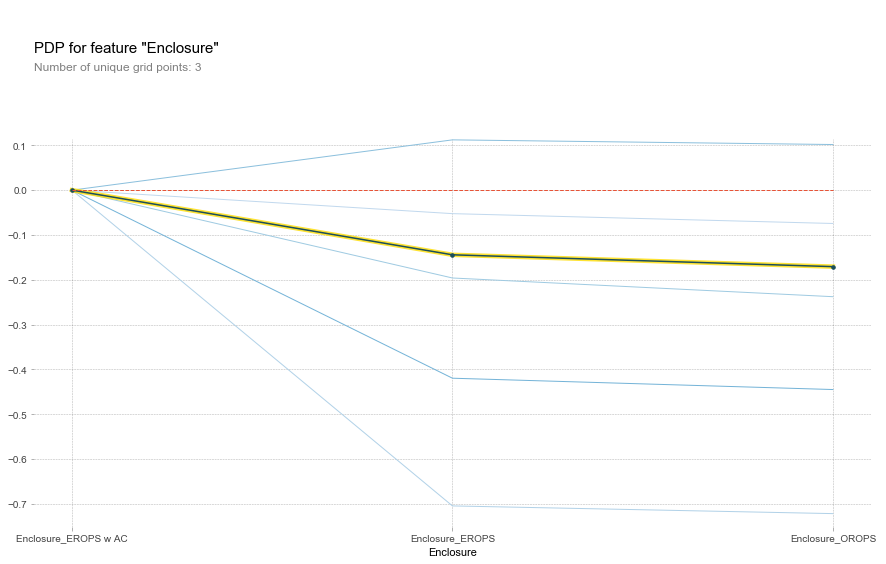

In [133]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [134]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

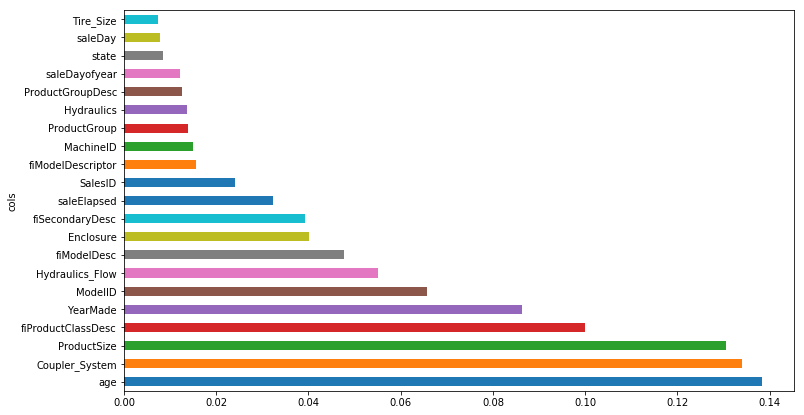

In [135]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

# Tree interpreter

In [138]:
from treeinterpreter import treeinterpreter as ti

In [139]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [140]:
row = X_valid.values[None,0]; row

array([[      1999,          0,          5,         17,        665,          0, 1284595200,          0,          1,
              3232,          0,    4364751,    2300944,         12,          4,          4,         35,        259,
                16,          0,         11]], dtype=int64)

In [141]:
prediction, bias, contributions = ti.predict(m, row)

In [142]:
prediction[0], bias[0]

(array([9.211971]), 10.105194813382308)

In [143]:
idxs = np.argsort(contributions[0])

In [144]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.5707108894084898),
 ('age', 11, -0.15368602069622322),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.13760992522155763),
 ('fiModelDesc', 'KX1212', -0.06929306122970816),
 ('fiSecondaryDesc', nan, -0.06332015231200047),
 ('fiModelDescriptor', nan, -0.0291254768525127),
 ('Enclosure', 'EROPS', -0.02173078479239914),
 ('SalesID', 4364751, -0.019655861631191797),
 ('Tire_Size', nan, -0.013737609567190123),
 ('saleDayofyear', 259, -0.012239785212477506),
 ('Hydraulics', 'Standard', -0.0106770992808507),
 ('saleElapsed', 1284595200, -0.004410618669540289),
 ('saleDay', 16, 0.0009517584257430212),
 ('state', 'Ohio', 0.004014111524184782),
 ('ModelID', 665, 0.004116401236725231),
 ('ProductGroup', 'TEX', 0.010782549204569758),
 ('ProductGroupDesc', 'Track Excavators', 0.012424416195738575),
 ('Hydraulics_Flow', nan, 0.023629988086284737),
 ('MachineID', 2300944, 0.03581557982099266),
 ('YearMade', 1999, 0.06046332528535401),


In [145]:
contributions[0].sum()

-0.8932237870487334

# Extrapolation

In [146]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [147]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999975070115301

In [148]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
11,SalesID,0.762605
6,saleElapsed,0.169998
12,MachineID,0.051508
4,ModelID,0.003532
0,YearMade,0.003348
17,saleDayofyear,0.003006
9,fiModelDesc,0.001934
13,Hydraulics,0.001354
8,Enclosure,0.000749
7,fiSecondaryDesc,0.000616


In [149]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [150]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [151]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [152]:
x.drop(feats, axis=1, inplace=True)

In [153]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);

In [154]:
m.oob_score_

0.9813798691181054

In [155]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
17,age,0.239280
0,YearMade,0.198382
14,saleDayofyear,0.153735
4,ModelID,0.071913
15,saleDay,0.065853
8,fiModelDesc,0.055052
13,state,0.055002
3,fiProductClassDesc,0.028019
7,Enclosure,0.027711
10,Hydraulics,0.023022


In [157]:
set_rf_samples=50000

In [158]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [159]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12585418594792966, 0.226114089329993, 0.9668967864364154, 0.9086931789142666, 0.9078752163384899]


In [160]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.12862158758782363, 0.2225525930226897, 0.9654249706281692, 0.9115468524828936, 0.9076591738555831]
saleElapsed
[0.13062262283100795, 0.23243377134539214, 0.964340797521932, 0.9035179701664618, 0.9024619023410606]
MachineID
[0.12828218937858074, 0.22289501043604956, 0.9656071985246013, 0.9112744566603326, 0.9090736031860862]
age
[0.12541611079982554, 0.22758994979538283, 0.9671268376852623, 0.9074973586219807, 0.9081288070209286]
YearMade
[0.12573808397051783, 0.22799709242235602, 0.9669578344779597, 0.9071661009755723, 0.9075904236162826]
saleDayofyear
[0.12865963107990175, 0.22473199112659725, 0.9654045145071172, 0.9098059739377757, 0.9068749980599277]


In [161]:
reset_rf_samples()

In [162]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13846479511533685, 0.217695913815956, 0.9599305334277433, 0.9153652864447676, 0.908545423919143]


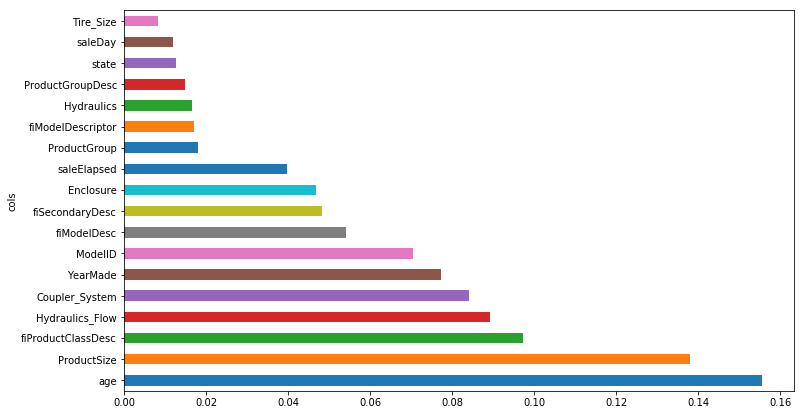

In [163]:
plot_fi(rf_feat_importance(m, X_train));

In [164]:
np.save('ml_fastai/subs_cols.npy', np.array(df_subs.columns))

# Final Model

In [165]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 58.4 s
[0.081163271413532, 0.2106096395776275, 0.9862325371467029, 0.9207855403991887, 0.9137468307211012]
